<a href="https://colab.research.google.com/github/mike2ox/databreak-python-basic/blob/master/data_science_by_python_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 실습에 필요한 data가 있는 repo
!git clone https://github.com/mike2ox/databreak-python-basic.git

# 폰트 다운
!apt-get install fonts-nanum*
!apt-get install fontconfig
!fc-cache -fv
!cp /usr/share/fonts/truetype/nanum/Nanum* /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/
!rm -rf /content/.cache/matplotlib/

'''
  한글문제로 인해 OS에 따른 폰트 변경 code block
'''
import platform
import matplotlib as plt
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False

# colab 환경이니 경로 설정 주의
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = plt.font_manager.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
font_manager._rebuild()

fatal: destination path 'databreak-python-basic' already exists and is not an empty directory.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state in

In [2]:
!cat ./databreak-python-basic/data/03.\ test_first.html

<!DOCTYPE html>
<html>
    <head>
        <title>Very Simple HTML Code by PinkWink</title>
    </head>
    <body>
        <div>
            <p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
            </p>
            <p class="inner-text second-item">
                Happy Data Science.
                <a href="https://www.python.org" id="py-link">Python</a>
            </p>
        </div>
        <p class="outer-text first-item" id="second">
            <b>
                Data Science is funny.
            </b>
        </p>
        <p class="outer-text">
            <b>
                All I need is Love.
            </b>
        </p>
    </body>
</html>

3-1 웹 스크래핑할 때 유용한 Beutiful Soup4 사용

In [0]:
from bs4 import BeautifulSoup

In [4]:
page = open("./databreak-python-basic/data/03. test_first.html",'r').read()
soup = BeautifulSoup(page, 'html.parser')
# 들여쓰기 표현위해 prettify 사용
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   Very Simple HTML Code by PinkWink
  </title>
 </head>
 <body>
  <div>
   <p class="inner-text first-item" id="first">
    Happy PinkWink.
    <a href="http://www.pinkwink.kr" id="pw-link">
     PinkWink
    </a>
   </p>
   <p class="inner-text second-item">
    Happy Data Science.
    <a href="https://www.python.org" id="py-link">
     Python
    </a>
   </p>
  </div>
  <p class="outer-text first-item" id="second">
   <b>
    Data Science is funny.
   </b>
  </p>
  <p class="outer-text">
   <b>
    All I need is Love.
   </b>
  </p>
 </body>
</html>


In [5]:
list(soup.children)

['html', '\n', <html>
 <head>
 <title>Very Simple HTML Code by PinkWink</title>
 </head>
 <body>
 <div>
 <p class="inner-text first-item" id="first">
                 Happy PinkWink.
                 <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
 </p>
 <p class="inner-text second-item">
                 Happy Data Science.
                 <a href="https://www.python.org" id="py-link">Python</a>
 </p>
 </div>
 <p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>
 <p class="outer-text">
 <b>
                 All I need is Love.
             </b>
 </p>
 </body>
 </html>]

In [6]:
# 특정 태그를 전부 보고 싶을때 사용
# 입력 파라미터 형식을 사용해 id, class도 추가 필터 적용할 수 있음
soup.find_all('p')

[<p class="inner-text first-item" id="first">
                 Happy PinkWink.
                 <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
 </p>, <p class="inner-text second-item">
                 Happy Data Science.
                 <a href="https://www.python.org" id="py-link">Python</a>
 </p>, <p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>, <p class="outer-text">
 <b>
                 All I need is Love.
             </b>
 </p>]

In [7]:
# 태그 안 text 가져와줌
for each_tag in soup.find_all('p'):
  print(each_tag.get_text())


                Happy PinkWink.
                PinkWink


                Happy Data Science.
                Python



                Data Science is funny.
            



                All I need is Love.
            



In [8]:
# a 태그를 각각 가져와 hyperlink와 태그 안에 있는 text를 출력 
for each in soup.find_all('a'):
  href = each['href']
  text = each.string
  print(text + '-->' + href)

PinkWink-->http://www.pinkwink.kr
Python-->https://www.python.org


3-2 개발자 도구 사용해서 태그 찾고 가져오기

In [0]:
from urllib.request import urlopen

In [10]:
url = 'https://finance.naver.com/marketindex/'
page = urlopen(url)
soup = BeautifulSoup(page, 'html.parser')
print(soup.prettify())

<script language="javascript" src="/template/head_js.nhn?referer=info.finance.naver.com&amp;menu=marketindex&amp;submenu=market">
</script>
<script src="/js/info/jindo.min.ns.1.5.3.euckr.js" type="text/javascript">
</script>
<script src="/js/jindo.1.5.3.element-text-patch.js" type="text/javascript">
</script>
<div id="container" style="padding-bottom:0px;">
 <script language="JavaScript" src="/js/flashObject.js?20191212151800">
 </script>
 <div class="market_include">
  <div class="market_data">
   <div class="market1">
    <div class="title">
     <h2 class="h_market1">
      <span>
       환전 고시 환율
      </span>
     </h2>
    </div>
    <!-- data -->
    <div class="data">
     <ul class="data_lst" id="exchangeList">
      <li class="on">
       <a class="head usd" href="/marketindex/exchangeDetail.nhn?marketindexCd=FX_USDKRW" onclick="clickcr(this, 'fr1.usdt', '', '', event);">
        <h3 class="h_lst">
         <span class="blind">
          미국 USD
         </span>
        </h3>
 

In [11]:
# span이면서 동시에 class가 value인 태그들만 스크래핑
soup.find_all('span', 'value')

[<span class="value">1,160.90</span>,
 <span class="value">1,061.05</span>,
 <span class="value">1,286.34</span>,
 <span class="value">165.71</span>,
 <span class="value">109.4500</span>,
 <span class="value">1.1076</span>,
 <span class="value">1.3004</span>,
 <span class="value">97.2700</span>,
 <span class="value">60.44</span>,
 <span class="value">1552.75</span>,
 <span class="value">1474.7</span>,
 <span class="value">55233.76</span>]

In [12]:
soup.find_all('span',attrs={'value'})[0].string

'1,160.90'

3-3 시카고 샌드위치 맛집 소개 사이트 접근, 3-4 데이터 가져오기

In [13]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

url_base = 'https://www.chicagomag.com/'
url_sub = 'Chicago-Magazine/November-2012/Best-Sandwiches-Chicago/'
url = url_base+url_sub

html = urlopen(url)
soup = BeautifulSoup(html, 'html.parser')

# 첫번째 맛집의 html 정보 가져옴
tmp_one = soup.find_all('div', attrs={'sammy'})[0]
print(tmp_one)

<div class="sammy" style="position: relative;">
<div class="sammyRank">1</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/"><b>BLT</b><br>
Old Oak Tap<br>
<em>Read more</em> </br></br></a></div>
</div>


In [14]:
type(tmp_one)

bs4.element.Tag

In [15]:
print(tmp_one.find(class_='sammyRank'))

<div class="sammyRank">1</div>


In [16]:
tmp_one.find('a')['href']

'/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/'

In [17]:
# 정규식으로 메뉴와 식당명을 분리
import re

tmp_string = tmp_one.find(attrs="sammyListing").get_text()
re.split('\n|\r\n', tmp_string)
print(re.split('\n|\r\n', tmp_string)[0])
print(re.split('\n|\r\n', tmp_string)[1])
print(re.split('\n|\r\n', tmp_string)[2])

BLT
Old Oak Tap
Read more 


In [0]:
rank = []
menu = []
restaurant = []
url_add = []

list_soup = soup.find_all('div', attrs='sammy')

In [0]:
import urllib

for item in list_soup:
  rank.append(item.find(class_='sammyRank').get_text())
  info_string = item.find(attrs='sammyListing').get_text()
  menu.append(re.split('\n|\r\n', info_string)[0])
  restaurant.append(re.split('\n|\r\n', info_string)[1])

  url_add.append(urllib.parse.urljoin(url_base, item.find('a')['href']))

In [20]:
print(rank[:5])
print(menu[:])
print(restaurant[:])
print(url_add[:])

['1', '2', '3', '4', '5']
['BLT', 'Fried Bologna', 'Woodland Mushroom', 'Roast Beef', 'PB&L', 'Belgian Chicken Curry Salad', 'Lobster Roll', 'Smoked Salmon Salad', 'Atomica Cemitas', 'Grilled Laughing Bird Shrimp and Fried Po’ Boy', 'Ham and Raclette Panino', 'Breaded Steak', 'The Hawkeye', 'Chicken Dip', 'Wild Boar Sloppy Joe', 'Meatball Sub', 'Corned Beef', 'Turkey Club', 'Falafel', 'Crab Cake', 'Chicken Schnitzel', 'Shawarma', 'Toasted Pimiento Cheese', 'Vegetarian Panino', 'Cali Chèvre', 'Pastrami', 'The Fredo', 'Smoked Ham', 'Jibarito', 'Shaved Prime Rib', 'Serrano Ham and Manchego Cheese', 'Tuna Salad', 'Paramount Reuben', 'The Istanbul', 'B.A.D.', 'Duck Confit and Mozzarella', 'Croque Monsieur', 'Green Garbanzo', 'The Hen House', 'Tuscan Chicken', 'The Marty ', 'Whitefish', 'Oat Bread, Pecan Butter, and Fruit Jam', 'Cauliflower Melt', 'Cubana', 'Kufta', 'Debbie’s Egg Salad', 'Beef Curry', 'Le Végétarien', 'The Gatsby']
['Old Oak Tap', 'Au Cheval', 'Xoco', 'Al’s Deli', 'Publican 

In [24]:
import pandas as pd

data = {'Rank':rank, 'Menu':menu, 'Restaurant':restaurant, 'Url':url_add}
df = pd.DataFrame(data)
df.head()

,Rank,Menu,Restaurant,Url
0,1,BLT,Old Oak Tap,https://www.chicagomag.com/Chicago-Magazine/No...
1,2,Fried Bologna,Au Cheval,https://www.chicagomag.com/Chicago-Magazine/No...
2,3,Woodland Mushroom,Xoco,https://www.chicagomag.com/Chicago-Magazine/No...
3,4,Roast Beef,Al’s Deli,https://www.chicagomag.com/Chicago-Magazine/No...
4,5,PB&L,Publican Quality Meats,https://www.chicagomag.com/Chicago-Magazine/No...


In [27]:
df = pd.DataFrame(data, columns=['Rank','Restaurant','Menu','Url'])
df.head()

,Rank,Restaurant,Menu,Url
0,1,Old Oak Tap,BLT,https://www.chicagomag.com/Chicago-Magazine/No...
1,2,Au Cheval,Fried Bologna,https://www.chicagomag.com/Chicago-Magazine/No...
2,3,Xoco,Woodland Mushroom,https://www.chicagomag.com/Chicago-Magazine/No...
3,4,Al’s Deli,Roast Beef,https://www.chicagomag.com/Chicago-Magazine/No...
4,5,Publican Quality Meats,PB&L,https://www.chicagomag.com/Chicago-Magazine/No...


In [0]:
# dataframe으로 생성한 db를 저장
df.to_csv('./databreak-python-basic/data/03. best_sandwiches_list_chicago.csv',sep=',',encoding='UTF-8')

3-4 다수의 웹페이지에서 자동으로 접근, 정보 가져오기

In [29]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

import pandas as pd

df = pd.read_csv('./databreak-python-basic/data/03. best_sandwiches_list_chicago.csv', index_col=0)
df.head()

,Rank,Restaurant,Menu,Url
0,1,Old Oak Tap,BLT,https://www.chicagomag.com/Chicago-Magazine/No...
1,2,Au Cheval,Fried Bologna,https://www.chicagomag.com/Chicago-Magazine/No...
2,3,Xoco,Woodland Mushroom,https://www.chicagomag.com/Chicago-Magazine/No...
3,4,Al’s Deli,Roast Beef,https://www.chicagomag.com/Chicago-Magazine/No...
4,5,Publican Quality Meats,PB&L,https://www.chicagomag.com/Chicago-Magazine/No...



<!DOCTYPE doctype html>

<html lang="en">
<head>
<!-- Urbis magnitudo. Fabulas magnitudo. -->
<meta charset="utf-8"/>
<style>a.edit_from_site {display: none !important;}</style>
<title>
  1. Old Oak Tap BLT |
  Chicago magazine
      |  November 2012
    </title>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable = no" name="viewport">
<meta content="“Truly inspired.”" name="description"/>
<!-- <meta name="description" content="&#8220;Truly inspired.&#8221;"> -->
<meta content="" name="keywords"/>
<meta content="37873197144" property="fb:pages">
<link href="//www.googletagservices.com" rel="dns-prefetch"/>
<link href="//ajax.googleapis.com" rel="dns-prefetch"/>
<link href="//securepubads.g.doubleclick.net" rel="dns-prefetch"/>
<link href="//media.chicagomag.com" rel="dns-prefetch"/>
<link href="//ox-d.godengo.com/" rel="dns-prefetch"/>
<link href="//www.google-analytics.com" rel="dns-prefetch"/>
<link href="//ping.chartbeat.net" rel="dns-prefetch"/>
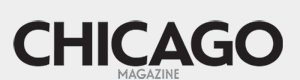

In [30]:
html = urlopen(df['Url'][0])
soup_tmp = BeautifulSoup(html, 'html.parser')
soup_tmp

In [31]:
price_tmp = soup_tmp.find('p',attrs='addy').get_text()
price_tmp

'\n$10. 2109 W. Chicago Ave., 773-772-0406, theoldoaktap.com'

In [34]:
# 가격정보 가져오기
# string을 split해서 list로 받고 거기서 첫번째 값이 가격
price_tmp.split()[0][:-1]

'$10'

In [40]:
# list 인자들을 하나로 합칠때 사용, ' '는 합칠때 구분자로 사용
' '.join(price_tmp.split()[1:-2])

'2109 W. Chicago Ave.,'

In [0]:
price = []
address = []

for n in df.index[:3]:
  html = urlopen(df['Url'][n])
  soup_tmp= BeautifulSoup(html, 'lxml')

  gettings = soup_tmp.find('p',attrs='addy').get_text()

  price.append(gettings.split()[0][:-1])
  address.append(' '.join(gettings.split()[1:-2]))

In [49]:
print(price)

['$10', '$9', '$9.50']


In [50]:
print(address)

['2109 W. Chicago Ave.,', '800 W. Randolph St.,', '445 N. Clark St.,']


3-6 tqdm 모듈을 사용해서 상태 진행바를 통해 샌드위치 페이지 50개 가져오는 현황 보기

In [52]:
from tqdm import tqdm_notebook

price = []
address = []

for n in tqdm_notebook(df.index[:]):
  html = urlopen(df['Url'][n])
  soup_tmp= BeautifulSoup(html, 'lxml')

  gettings = soup_tmp.find('p',attrs='addy').get_text()

  price.append(gettings.split()[0][:-1])
  address.append(' '.join(gettings.split()[1:-2]))

3-7 50개 웹 페이지 정보 확인

In [53]:
print(price)
print(address)

['$10', '$9', '$9.50', '$9.40', '$10', '$7.25', '$16', '$10', '$9', '$17', '$11', '$5.49', '$14', '$10', '$13', '$4.50', '$11.95', '$11.50', '$6.25', '$15', '$5', '$6', '$8', '$5.99', '$7.52', '$11.95', '$7.50', '$12.95', '$7', '$21', '$9.79', '$9.75', '$13', '$7.95', '$9', '$9', '$8', '$8', '$7', '$6', '$7.25', '$11', '$6', '$9', '$5.49', '$8', '$6.50', '$7.50', '$8.75', '$6.85']
['2109 W. Chicago Ave.,', '800 W. Randolph St.,', '445 N. Clark St.,', '914 Noyes St., Evanston,', '825 W. Fulton Mkt.,', '100 E. Walton', '1639 S. Wabash Ave.,', '2211 W. North Ave.,', '3619 W. North Ave.,', '3267 S. Halsted St.,', '2537 N. Kedzie Blvd.,', 'Multiple', '3124 N. Broadway,', '3455 N. Southport Ave.,', '2657 N. Kedzie Ave.,', '1120 W. Grand Ave.,', '1141 S. Jefferson St.,', '333 E. Benton Pl.,', '1411 N. Wells St.,', '1747 N. Damen Ave.,', '3209 W. Irving Park', 'Multiple', '5347 N. Clark St.,', '2954 W. Irving Park Rd.,', 'Multiple', '191 Skokie Valley Rd., Highland Park,', 'Multiple', '1818 W.

In [57]:
print(len(price))
print(len(address))
print(len(df))

50

In [58]:
df['Price'] = price
df['Address'] = address

# column 2개 추가
df = df.loc[:,['Rank','Rastaurant','Menu','Price','Address']]
# rank를 index로 설정, 수정 가능 속성 적용
df.set_index(keys='Rank',inplace=True)
df.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,Rastaurant,Menu,Price,Address
Rank,,,,
1,NaN,BLT,$10,"2109 W. Chicago Ave.,"
2,NaN,Fried Bologna,$9,"800 W. Randolph St.,"
3,NaN,Woodland Mushroom,$9.50,"445 N. Clark St.,"
4,NaN,Roast Beef,$9.40,"914 Noyes St., Evanston,"
5,NaN,PB&L,$10,"825 W. Fulton Mkt.,"


In [0]:
df.to_csv('./databreak-python-basic/data/03. best_sandwiches_list_chicago2.csv', sep=',', encoding='utf-8')